In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv("results.csv", header=None)
df.columns = ["episode", "loss", "q_value", "reward", "epsilon"]
df["moving_average_reward"] = df["reward"].rolling(100).mean()
df["moving_average_loss"] = df["loss"].rolling(100).mean()
df["moving_average_q_value"] = df["q_value"].rolling(100).mean()
df["moving_average_epsilon"] = df["epsilon"].rolling(100).mean()
df["episode"] = df.index + 1

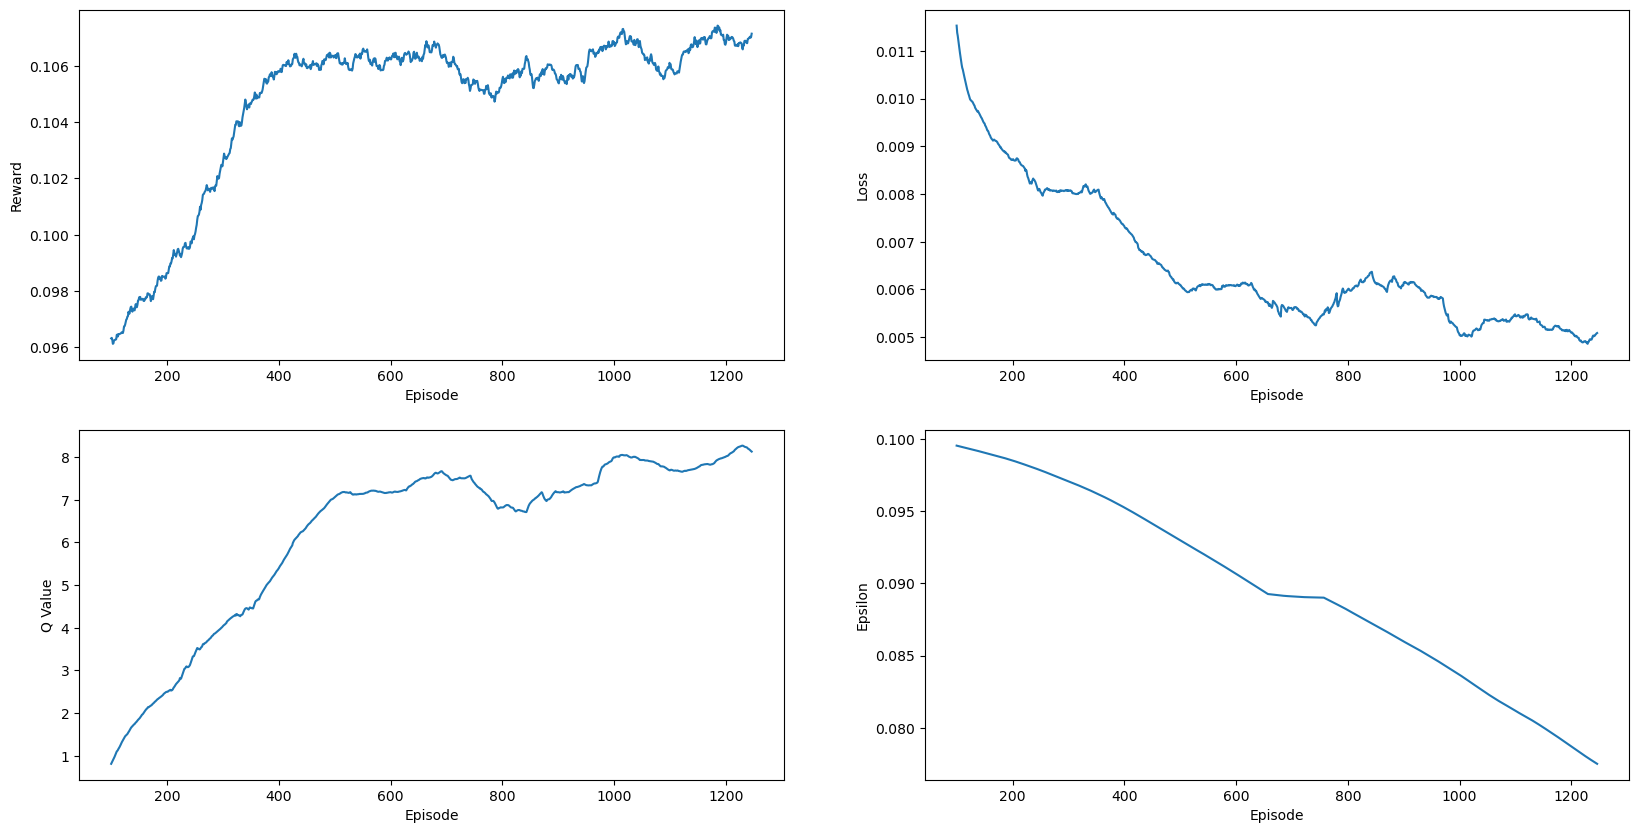

In [6]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(df["episode"], df["moving_average_reward"])
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.subplot(2, 2, 2)
plt.plot(df["episode"], df["moving_average_loss"])
plt.xlabel("Episode")
plt.ylabel("Loss")
plt.subplot(2, 2, 3)
plt.plot(df["episode"], df["moving_average_q_value"])
plt.xlabel("Episode")
plt.ylabel("Q Value")
plt.subplot(2, 2, 4)
plt.plot(df["episode"], df["moving_average_epsilon"])
plt.xlabel("Episode")
plt.ylabel("Epsilon")
# plt.savefig("results.png")
plt.show()

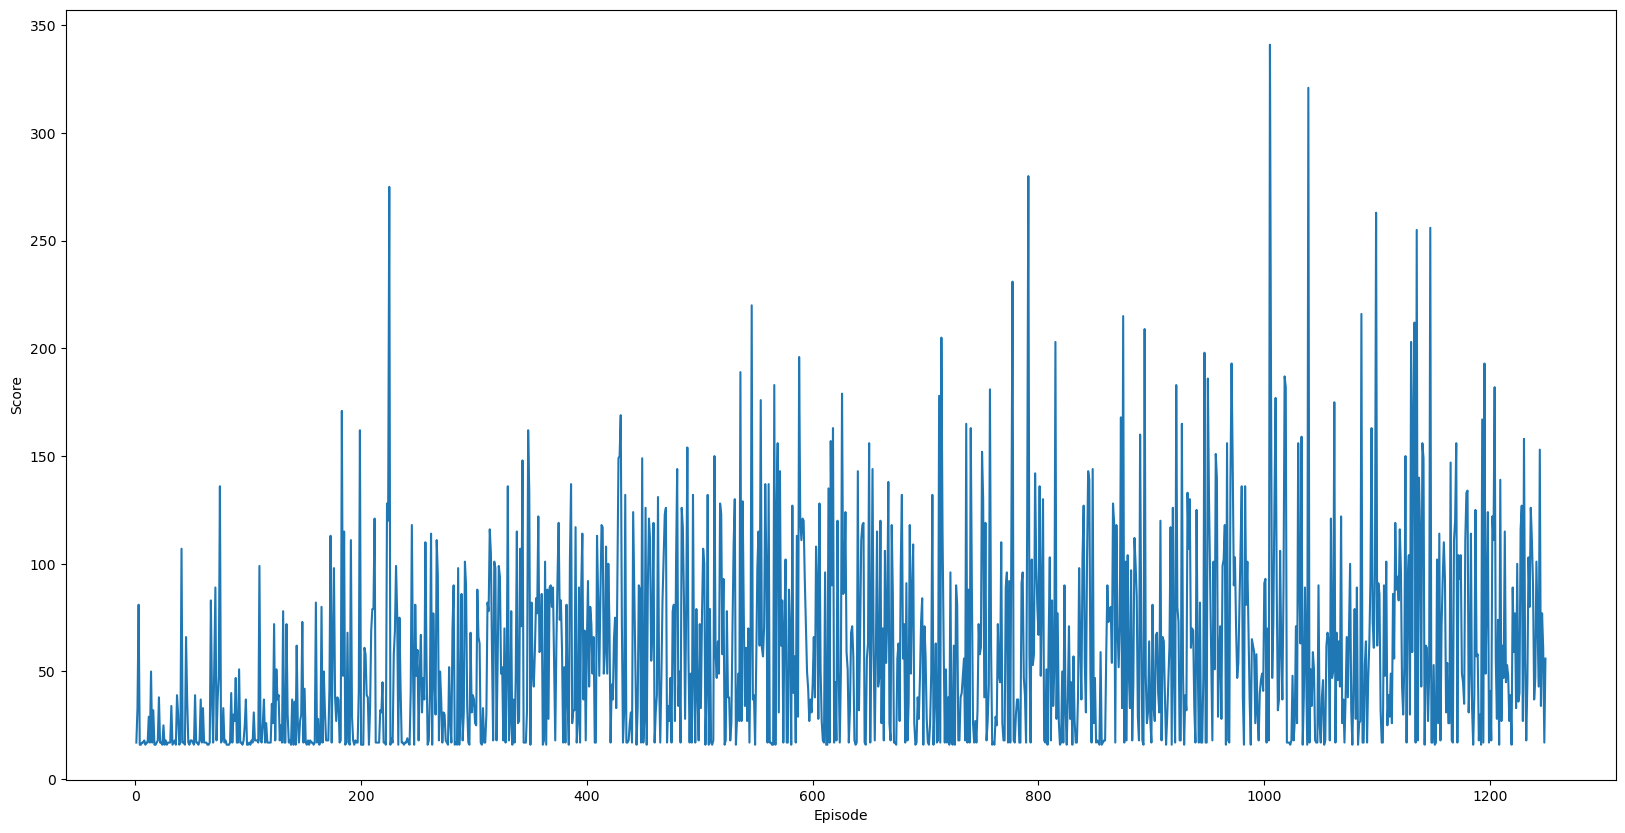

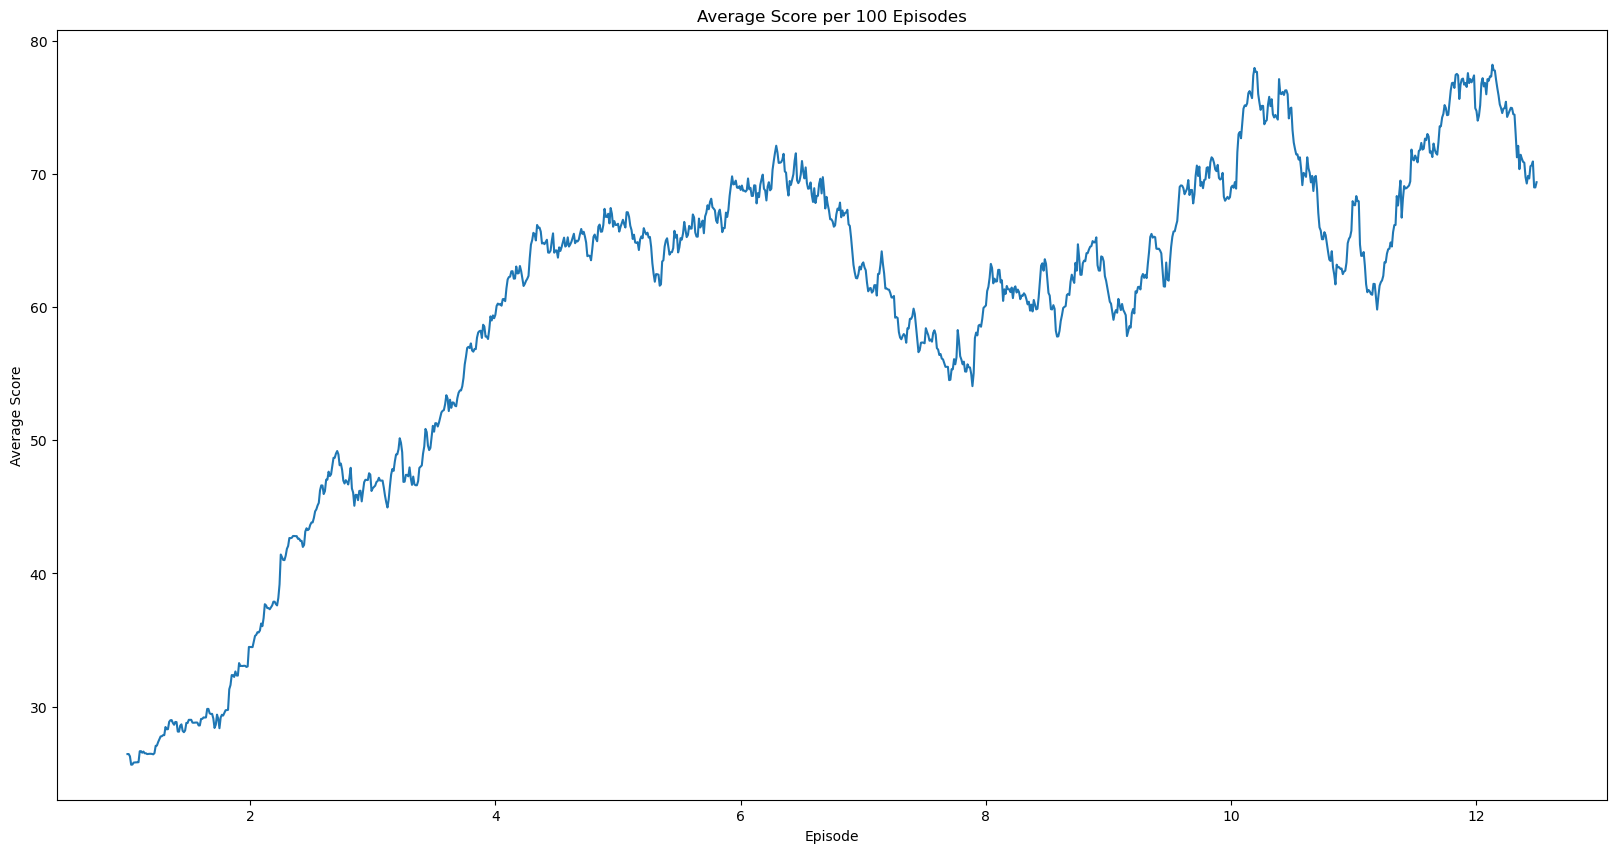

In [13]:
df = pd.read_csv("scores.csv", header=None)
df.columns = ["score"]
# add new column for episode
df["episode"] = df.index + 1
plt.figure(figsize=(20, 10))
plt.plot(df["episode"], df["score"])
plt.xlabel("Episode")
plt.ylabel("Score")


# calculate the average score per 100 episodes and draw a graph
def calculate_average_score_per_100_episodes():
    df = pd.read_csv("scores.csv", header=None)
    df.columns = ["score"]
    df["episode"] = df.index + 1
    df["average_score"] = df["score"].rolling(100).mean()
    df = df.dropna()
    df = df.reset_index(drop=True)
    return df


df = calculate_average_score_per_100_episodes()
plt.figure(figsize=(20, 10))
plt.title("Average Score per 100 Episodes")
plt.plot(df["episode"]/100, df["average_score"])
plt.xlabel("Episode")
plt.ylabel("Average Score")
plt.show()
